# EDA Minerals

We will guess which elements are the most important in minerals.
We will guess the most richest countries with minerals.

## 1. Observe the dataset

### 1.1. Import necessary modules

In [1]:
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

### 1.2. Read and understand the data

Mineral Name = common name, 
RRUFF Chemistry = RRUFF formula, 
IMA Chemistry = International Mineralogical Association formula, 
Chemistry Elements = chemistry elements in mineral,
IMA Number = unique IMA number,
RRUFF IDs = unique RRUFF ID, 
Country of Type Locality = country,
Year First Published = year the mineral was first officialy described,
IMA Status = official status of IMA assigned,
Structural Groupname = structural group of minerals,
Fleischers Groupname = structural group for minerals by Fleischers Glossary 2008,
Status Notes = publication,
Crystal Systems = point groups,
Oldest Known Age = age in megaannums (one million years)

In [4]:
minerals = pd.read_csv("RRUFF_Export_20230608_052338.csv")

In [5]:
minerals.sample(5)

,Mineral Name,RRUFF Chemistry (plain),IMA Chemistry (plain),Chemistry Elements,IMA Number,RRUFF IDs,Country of Type Locality,Year First Published,IMA Status,Structural Groupname,Fleischers Groupname,Status Notes,Crystal Systems,Space Groups,Oldest Known Age (Ma),Valence Elements,Paragenetic Modes
1909,Garyansellite,Mg2Fe3+(PO4)2(OH)·2H2O,Mg2Fe3+(PO4)2(OH)·2H2O,Mg Fe P O H,IMA1981-019,NaN,Canada,1981,Approved,Reddingite,reddingite,"Sturman B D, Dunn P J (1984) Garyansellite, a ...",orthorhombic,Pbna,NaN,Mg Fe^3+ P O H,"Biotic, Secondary; Stage 7: Great Oxidation Ev..."
4803,Shafranovskite,"Na3K2(Mn2+,Fe3+,Na)4[Si9(O,OH)27](OH)2·nH2O","Na3K2(Mn,Fe,Na)4[Si9(O,OH)27](OH)2·nH2O",Na K Mn Fe Si O H,IMA1981-048,NaN,Russia,1981,Approved,,,"Khomyakov A P, Vrublevskaya Z V, Zvyagin B B, ...",hexagonal,P31c,413.6,Na K Mn^2+ Fe^3+ Si O H,"Abiotic, Primary; Stage 4b: Highly evolved ign..."
795,Callaghanite,Cu2+2Mg2CO3(OH)6·2H2O,Cu2Mg2(CO3)(OH)6·2H2O,Cu Mg C O H,NaN,R050598,USA,1954,"Approved,Grandfathered",,,"Beck C W, Burns J H (1954) Callaghanite, a new...",monoclinic,C2/c,1080.0,Cu^2+ Mg C O H,"Abiotic, Biotic, Secondary; Stage 4a: Earth's ..."
3923,Owyheeite,Ag1+3Pb2+10Sb3+11S2-28,Ag3Pb10Sb11S28,Ag Pb Sb S,NaN,R060396 R070543,USA,1920,"Approved,Grandfathered",,,Originally named silver-jamesonite:\r\nBurton ...,monoclinic,P2_1/c,2680.0,Ag^1+ Pb^2+ Sb^3+ S^2-,"Abiotic, Primary; Stage 4a: Earth's earliest c..."
3558,Montesommaite,K9(Si23Al9)O64·10H2O,K9(Si23Al9)O64·10H2O,K Si Al O H,IMA1988-038,NaN,Italy,1988,Approved,,zeolite,"Rouse R C, Dunn P J, Grice J D, Schlenker J L,...",tetragonal,I4_1/amd,0.4,K Si Al O H,"Abiotic, Primary; Stage 3a: Earth's earliest H..."


### 1.3. Rename columns with complicated headings

In [7]:
minerals.rename(columns={'Mineral Name':'Mineral','Chemistry Elements':'Elements', 'Country of Type Locality' : 'Country', 'Crystal Systems':'Systems', 'Oldest Known Age (Ma)' : 'Age', 'Structural Groupname' : 'Groupname'
    
}, inplace=True)

In [14]:
minerals.sample(5)

,Mineral,RRUFF Chemistry (plain),IMA Chemistry (plain),Elements,IMA Number,RRUFF IDs,Country,Year First Published,IMA Status,Groupname,Fleischers Groupname,Status Notes,Systems,Space Groups,Age,Valence Elements,Paragenetic Modes
3862,Omeiite,Os3+(As2)3-,OsAs2,Os As,NaN,NaN,China,1978,Approved,Löllingite,Marcasite-Löllingite-Löllingite subgroup,"Yingxin R, Qinde H, Jingao X (1978) A prelimin...",orthorhombic,Pnnm,2700.0,Os^3+ As,"Abiotic, Primary, Secondary; Stage 2: Planetes..."
5476,Vanadio-oxy-chromium-dravite,NaV3+3(Cr3+4Mg2)(Si6O18)(BO3)3(OH)3O,NaV3(Cr4Mg2)(Si6O18)(BO3)3(OH)3O,Na V Cr Mg Si O B H,IMA2012-034,NaN,Russia,2012,Approved,Tourmaline,,"Bosi F, Reznitskii L, Skogby H, Hålenius U (20...",hexagonal,R-3m,481.0,Na V^3+ Cr^3+ Mg Si O B H,"Abiotic, Secondary; Stage 4a: Earth's earliest..."
38,Agaite,Pb2+3Cu2+Te6+O5(OH)2(CO3),Pb3Cu2+Te6+O5(OH)2(CO3),Pb Cu Te O H C,IMA2011-115,NaN,USA,2011,Approved,Not in a structural group,,"Kampf A R, Mills S J, Housley R M, Marty J (20...",orthorhombic,Pca2_1,946.0,Pb^2+ Cu^2+ Te^6+ O H C,"Biotic, Secondary; Stage 7: Great Oxidation Ev..."
2224,Hermannroseite,CaCu2+(PO4)(OH),CaCu(PO4)(OH),Ca Cu P O H,IMA2010-006,NaN,Namibia,2010,Approved,Adelite,,"Schlüter J, Pohl D, Gebhard G (2011) The new m...",orthorhombic,P2_12_12_1,541.0,Ca Cu^2+ P O H,"Biotic, Secondary; Stage 7: Great Oxidation Ev..."
4716,Schieffelinite,Pb2+10Te6+6O20(OH)14(S6+O4)·5H2O,Pb10Te6+6O20(OH)14(SO4)(H2O)5,Pb Te O H S,IMA1979-043,R140572,USA,1979,Approved,Schieffelinite,,"Williams S A (1980) Schieffelinite, a new lead...",orthorhombic,C222_1,145.0,Pb^2+ Te^6+ O H S^6+,"Biotic, Secondary; Stage 7: Great Oxidation Ev..."


## 2. Working with nulls

In [8]:
minerals.isnull().sum(axis = 0)

Mineral                       0
RRUFF Chemistry (plain)       0
IMA Chemistry (plain)         0
Elements                      0
IMA Number                 1608
RRUFF IDs                  3598
Country                       0
Year First Published          0
IMA Status                    1
Groupname                     0
Fleischers Groupname          0
Status Notes                  5
Systems                     270
Space Groups                745
Age                        1080
Valence Elements              0
Paragenetic Modes            59
dtype: int64

## 3. Understand the distribution of chemistry elements in dataset

### 3.1. Split column Elements by space

In [18]:
elem = minerals.set_index('Mineral').Elements.str.split(' ', expand=True).stack().reset_index('Mineral').reset_index(drop=True)

In [19]:
elem.columns = ['Mineral', 'Element']

In [20]:
elem

,Mineral,Element
0,Abellaite,Na
1,Abellaite,Pb
2,Abellaite,C
3,Abellaite,O
4,Abellaite,H
...,...,...
27843,Zýkaite,Fe
27844,Zýkaite,As
27845,Zýkaite,O
27846,Zýkaite,S


### 3.2. Count all elements

In [21]:
elem['Element'].value_counts()

O     4797
H     3300
Si    1638
Ca    1451
S     1286
      ... 
Sm       2
Re       2
Hf       1
Dy       1
Er       1
Name: Element, Length: 74, dtype: int64

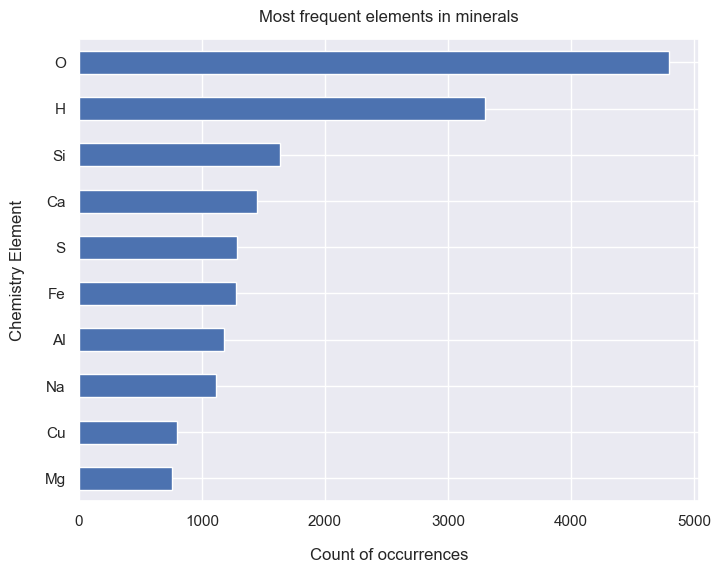

In [22]:
elem['Element'].value_counts()[0:10].sort_values().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count of occurrences", labelpad=14)
plt.ylabel("Chemistry Element", labelpad = 14)
plt.title("Most frequent elements in minerals", y=1.02);

## 4. Understand the distribution of countries in dataset

### 4.1. Understand data in Country column

In [23]:
minerals['Country'].value_counts()

USA                                           874
Russia                                        858
Italy                                         367
Germany                                       358
Canada                                        239
                                             ... 
Democratic Republic of the Congo / Namibia      1
Switzerland / Australia                         1
Nigeria                                         1
France / USA ?                                  1
Portugal / Germany                              1
Name: Country, Length: 241, dtype: int64

In [24]:
countr = minerals.set_index('Mineral').Country.str.split(' / ', expand = True).stack().reset_index('Mineral').reset_index(drop=True)
countr.columns = ['Mineral', 'Country']

In [25]:
countr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6015 entries, 0 to 6014
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Mineral  6015 non-null   object
 1   Country  6015 non-null   object
dtypes: object(2)
memory usage: 94.1+ KB


In [26]:
countr.sample(5)

,Mineral,Country
952,Chanabayaite,Chile
1717,Ferrorhodonite,Australia
2017,Giraudite-(Zn),France
1851,Fontarnauite,Turkey
5695,Vyalsovite,Russia


In [27]:
countr['Country'].value_counts()

USA                       887
Russia                    873
Italy                     384
Germany                   380
Canada                    244
                         ... 
Ethiopia                    1
Argentina (meteorite)       1
Antarctica (meteorite)      1
Niger                       1
Ukraine (meteorite)         1
Name: Country, Length: 168, dtype: int64

In [28]:
print(countr[countr['Country'].str.contains('meteorite', regex=False)])

              Mineral                 Country
21    Addibischoffite     Algeria (meteorite)
27          Adrianite      Mexico (meteorite)
52          Ahrensite     Morocco (meteorite)
63         Akimotoite   Australia (meteorite)
97      Allabogdanite      Russia (meteorite)
...               ...                     ...
5846           Xieite       China (meteorite)
5847        Xifengite       China (meteorite)
5910        Zagamiite     Nigeria (meteorite)
5911        Zagamiite     Morocco (meteorite)
5999      Zolenskyite  Azerbaijan (meteorite)

[113 rows x 2 columns]


In [29]:
print(countr[countr['Country'].str.contains('?', regex=False)])

              Mineral        Country
138          Alum-(K)        Italy ?
139         Alum-(Na)              ?
149          Alunogen              ?
308      Arsenopyrite              ?
328          Asbolane              ?
355            Augite              ?
442            Baryte              ?
577      Bismuthinite              ?
638           Bornite              ?
938        Chalcocite              ?
944      Chalcopyrite              ?
1158       Cordierite      Germany ?
1169         Corundum        India ?
1537        Erythrite      Germany ?
1672  Ferroalluaudite          USA ?
3256        Magnetite              ?
3477         Mesolite      Iceland ?
4261     Phylloretine      Denmark ?
5202          Taenite  New Zealand ?
5769       Whewellite      Hungary ?


In [30]:
countr['Country'] = countr['Country'].replace({' \?':''}, regex=True)
countr.loc[countr['Country'].str.contains('meteorite', case=False), 'Country'] = 'meteorite'
countr['Country'] = countr['Country'].replace('?', 'unknown')
countr.loc[countr['Country'].str.contains('IDP', case=False), 'Country'] = 'IDP'

1. Cut unnecessary spaces and escape characters (just in case)
2. Drop rows where country is unknown

In [31]:
countr['Country'].str.strip()
countr.drop(countr[countr.Country == 'unknown'].index, inplace=True)
countr['Country'].value_counts()[0:20]

USA                                 888
Russia                              873
Italy                               385
Germany                             382
Canada                              244
Sweden                              193
Australia                           174
China                               165
Japan                               157
Czech Republic                      149
Chile                               143
United Kingdom                      130
France                              124
meteorite                           115
Namibia                             108
Democratic Republic of the Congo    101
Switzerland                          96
Norway                               85
South Africa                         85
Denmark (Greenland)                  83
Name: Country, dtype: int64

Plot the most richest (20) countries with the minerals:

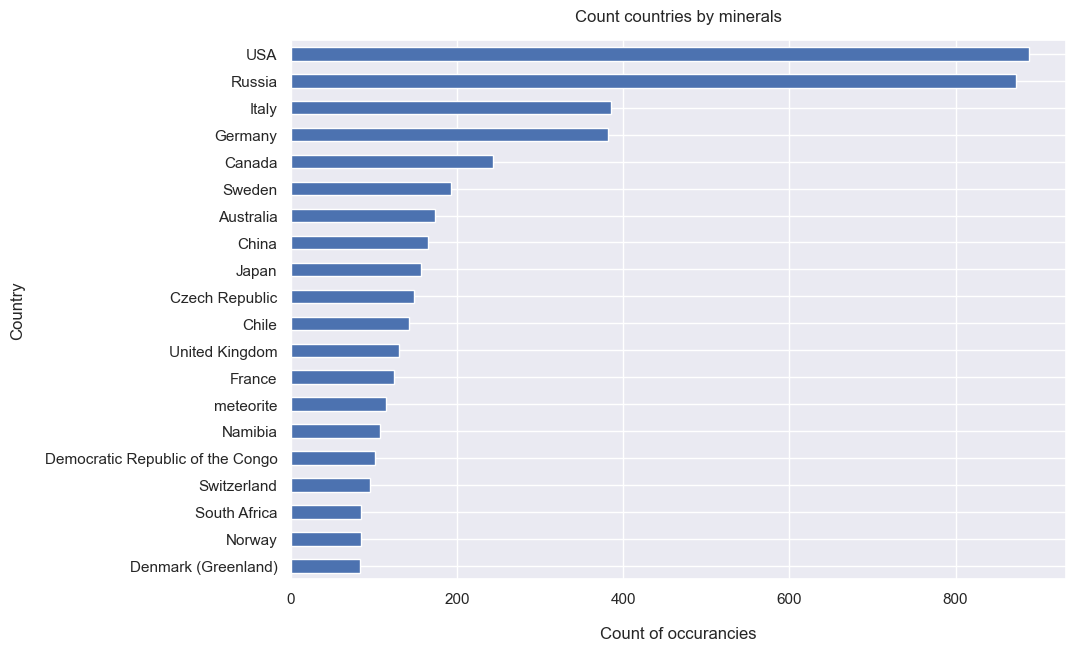

In [32]:
countr['Country'].value_counts()[0:20].sort_values().plot(kind='barh', figsize=(10, 7))
plt.xlabel("Count of occurancies", labelpad=14)
plt.ylabel("Country", labelpad=14)
plt.title("Count countries by minerals", y=1.02);

## 5. Merge countries and minerals with expanded elements

Drop rows with not frequent minerals and countries

In [33]:
countr = countr[countr['Country'].map(countr['Country'].value_counts()) >= 140]
elem = elem[elem['Element'].map(elem['Element'].value_counts()) >= 600]

Merge two dataframes (countries and elements) on Mineral column:

In [34]:
result = pd.merge(countr, elem, on='Mineral')
result

,Mineral,Country,Element
0,Abelsonite,USA,H
1,Abenakiite-(Ce),Canada,Na
2,Abenakiite-(Ce),Canada,Si
3,Abenakiite-(Ce),Canada,O
4,Abenakiite-(Ce),Canada,P
...,...,...,...
13108,Zýkaite,Czech Republic,Fe
13109,Zýkaite,Czech Republic,As
13110,Zýkaite,Czech Republic,O
13111,Zýkaite,Czech Republic,S


Plot countries count by elements in minerals

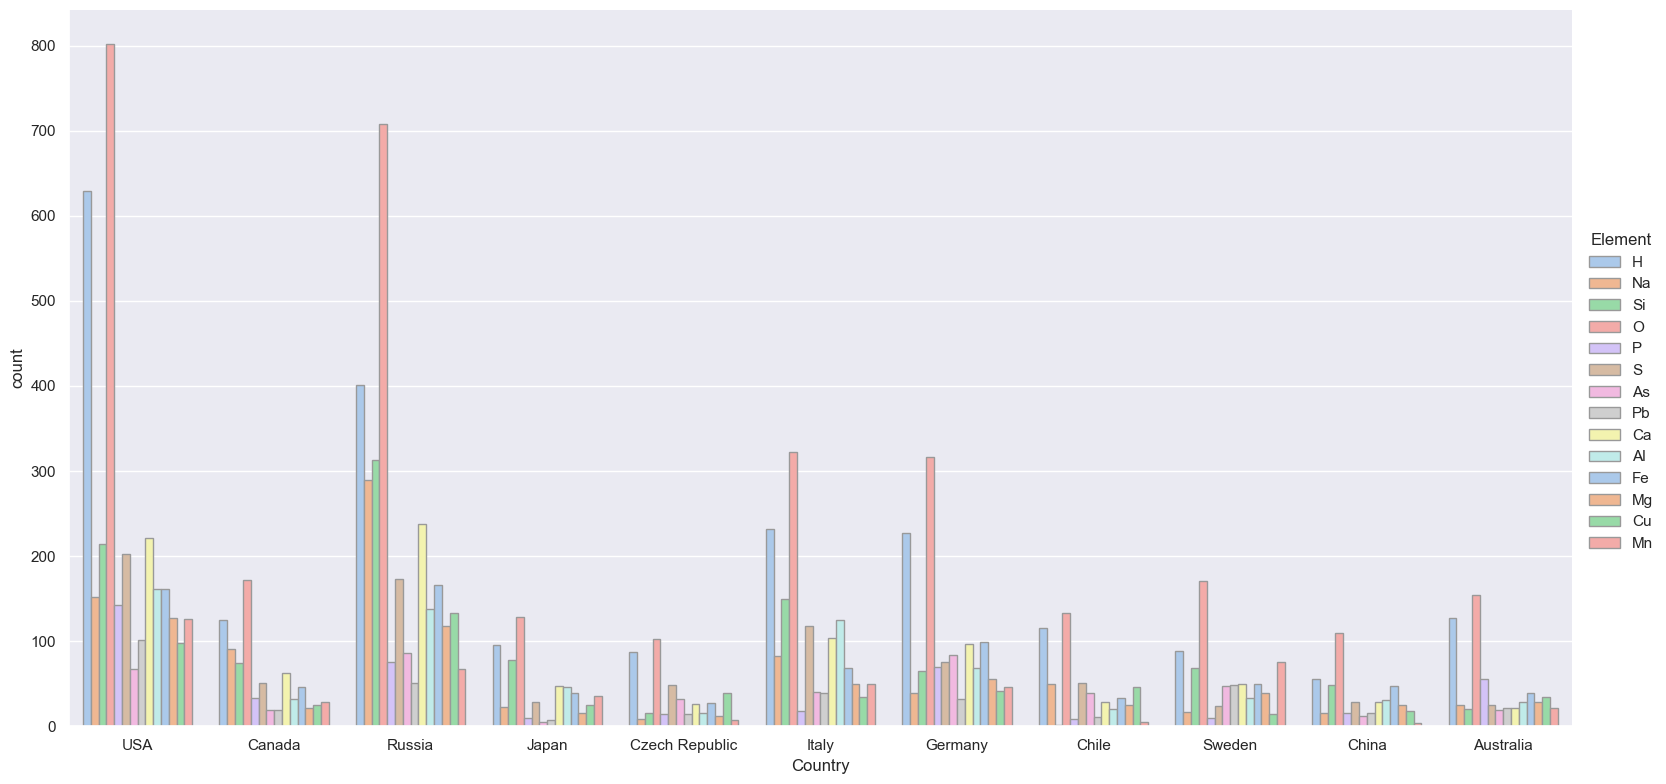

In [35]:
sns.catplot(x="Country", hue="Element", kind="count", palette="pastel", edgecolor=".6", data=result, height=8, aspect = 2)